In [ ]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
train_dir = '/content/drive/MyDrive/CAT_DOG_Dataset/train'
test_dir = "/content/drive/MyDrive/CAT_DOG_Dataset/test"

In [24]:
# Function to load and preprocess images
def load_images(data_dir, image_size=(128, 128)):
    images = []
    labels = []
    for label in os.listdir(data_dir):  # 'cats' and 'dogs' folders
        label_path = os.path.join(data_dir, label)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
                if img is not None:
                    img_resized = cv2.resize(img, image_size)  # Resize to 128x128
                    images.append(img_resized.flatten())  # Flatten image
                    labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
# Load training data
X_train, y_train = load_images(train_dir)


In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
# Load testing data
X_test, y_test = load_images(test_dir)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
print("Training the SVM model...")
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train_encoded)

Training the SVM model...


SVC()

In [ ]:
print("Predicting on test data...")
y_pred = svm.predict(X_test)

Predicting on test data...


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.57


Skipping train size 0.10 - only one class present in subset.
Skipping train size 0.20 - only one class present in subset.
Skipping train size 0.30 - only one class present in subset.
Skipping train size 0.40 - only one class present in subset.
Skipping train size 0.50 - only one class present in subset.


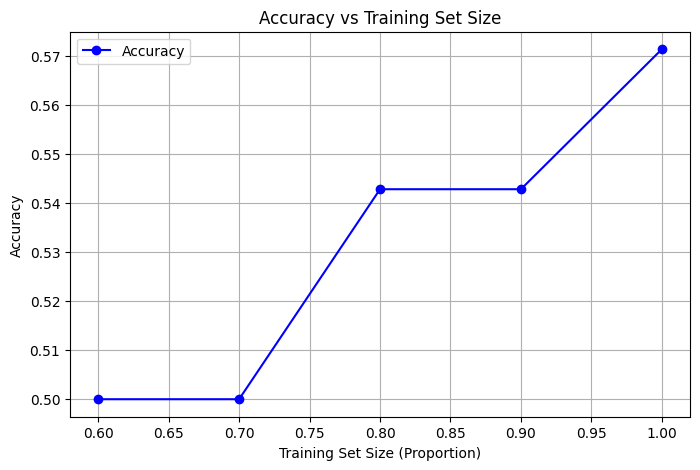

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Plotting Accuracy Graph
def plot_accuracy_graph(X_train, y_train, X_test, y_test):
    train_sizes = np.linspace(0.1, 1.0, 10)  # Proportion of training data to use
    accuracies = []

    for train_size in train_sizes:
        # Split data into smaller training sets
        subset_size = int(train_size * len(X_train))

        # Ensure both classes are present in the subset:
        X_subset = X_train[:subset_size]
        y_subset = y_train[:subset_size]

        # Check if both classes are present
        if len(np.unique(y_subset)) > 1:
            svm = SVC(kernel='rbf', C=1.0, gamma='scale')
            svm.fit(X_subset, y_subset)
            y_pred = svm.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        else:
            print(f"Skipping train size {train_size:.2f} - only one class present in subset.")
            accuracies.append(np.nan)  # Append NaN for missing data

    # Plot the accuracy graph
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, accuracies, marker='o', color='b', label='Accuracy')
    plt.title("Accuracy vs Training Set Size")
    plt.xlabel("Training Set Size (Proportion)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
plot_accuracy_graph(X_train, y_train_encoded, X_test, y_test_encoded)

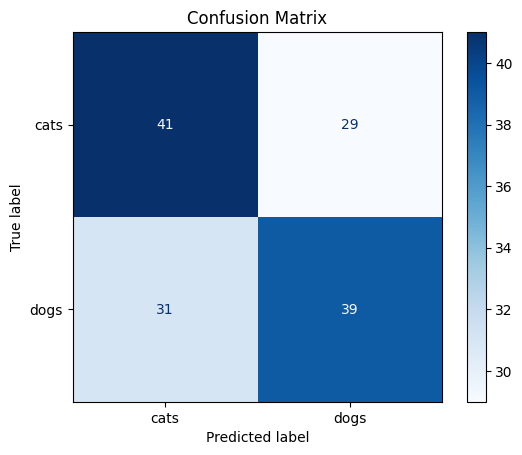

In [ ]:
# Step 2: Plotting Correlation Matrix
def plot_correlation_matrix(y_test, y_pred, label_encoder):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

# Call the functions after prediction

plot_correlation_matrix(y_test_encoded, y_pred, label_encoder)

In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


Classification Report:

              precision    recall  f1-score   support

        cats       0.57      0.59      0.58        70
        dogs       0.57      0.56      0.57        70

    accuracy                           0.57       140
   macro avg       0.57      0.57      0.57       140
weighted avg       0.57      0.57      0.57       140



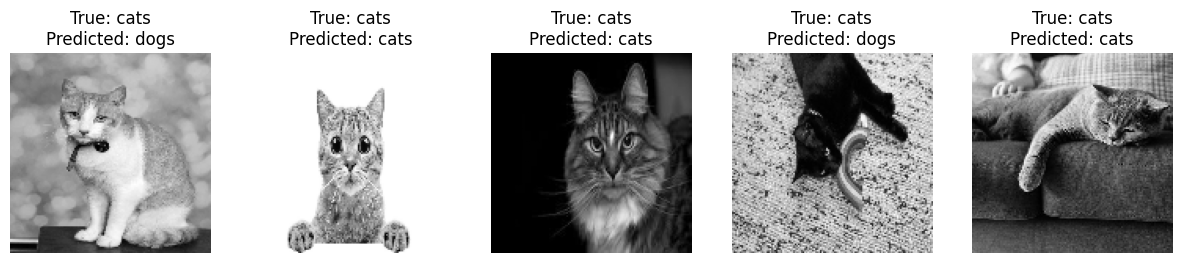

In [ ]:
import matplotlib.pyplot as plt

# Function to display images with predicted and true labels
def display_classification_results(X_test, y_test, y_pred, label_encoder, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        image = X_test[i].reshape(128, 128)  # Reshape flattened image back to 2D
        true_label = label_encoder.inverse_transform([y_test[i]])[0]
        predicted_label = label_encoder.inverse_transform([y_pred[i]])[0]

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
        plt.axis('off')
    plt.show()

# Display 5 images with predictions
display_classification_results(X_test, y_test_encoded, y_pred, label_encoder, num_samples=5)


In [ ]:
import pandas as pd

# Create a DataFrame to show true vs predicted labels
def print_detailed_results(y_test, y_pred, label_encoder):
    true_labels = label_encoder.inverse_transform(y_test)
    predicted_labels = label_encoder.inverse_transform(y_pred)
    results = pd.DataFrame({
        "True Label": true_labels,
        "Predicted Label": predicted_labels,
        "Correct?": ["Yes" if true == pred else "No" for true, pred in zip(true_labels, predicted_labels)]
    })
    print("\nClassification Results:\n")
    print(results.head(20))  # Display the first 20 results
    return results

# Print detailed results
results_df = print_detailed_results(y_test_encoded, y_pred, label_encoder)



Classification Results:

   True Label Predicted Label Correct?
0        cats            dogs       No
1        cats            cats      Yes
2        cats            cats      Yes
3        cats            dogs       No
4        cats            cats      Yes
5        cats            cats      Yes
6        cats            dogs       No
7        cats            dogs       No
8        cats            dogs       No
9        cats            dogs       No
10       cats            cats      Yes
11       cats            cats      Yes
12       cats            cats      Yes
13       cats            cats      Yes
14       cats            cats      Yes
15       cats            cats      Yes
16       cats            cats      Yes
17       cats            dogs       No
18       cats            cats      Yes
19       cats            dogs       No
